# ESTRATEGIA VALUE

## Autor: Lucía Saiz Lapique

__Examen__

__Gestión de Activos y Carteras__

__CUNEF__

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# opciones del notebook

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## LECTURA DE DATOS

Importamos además los datos del índice de MSCI para compararlos con la estrategia final.

In [3]:
indice = pd.read_excel('datos_examen2.xlsx', sheet_name = 'Precios Index')
indice['Date'] = pd.to_datetime(indice['Date'], format="%Y-%m-%d")
indice = indice.set_index('Date')
observacion = indice.index >= dt.datetime(2015, 4, 30)
indice = indice[(observacion)]
indice.head()

,Euro Stoxx 50 Pr,IBEX 35 INDEX,DOW JONES INDUS. AVG,MSCI WORLD,NASDAQ COMPOSITE INDEX,S&P 500 INDEX,NIKKEI 225,FTSE 100 INDEX
Date,,,,,,,,
2015-04-30,3615.59,11385.0,17840.52,1778.40,4941.424,2085.51,19520.01,6960.63
2015-05-01,3615.59,11385.0,18024.06,1787.40,5005.391,2108.29,19531.63,6985.95
2015-05-04,3632.94,11429.1,18070.40,1790.83,5016.929,2114.49,19531.63,6985.95
2015-05-05,3546.56,11115.6,17928.20,1773.42,4939.327,2089.46,19531.63,6927.58
2015-05-06,3558.03,11163.6,17841.98,1772.82,4919.645,2080.15,19531.63,6933.74


In [4]:
FTSE_cap = pdr.get_data_yahoo('^FTSC', 
                          start = dt.datetime(2015, 4, 30), 
                          end = dt.datetime(2020, 5, 1))
FTSE_cap = pd.DataFrame(FTSE_cap['Close'])
FTSE_cap

,Close
Date,
2015-04-30,4655.000000
2015-05-01,4648.600098
2015-05-05,4655.600098
2015-05-06,4666.600098
2015-05-07,4629.000000
...,...
2019-09-24,5478.299805
2019-09-25,5442.500000
2019-09-26,5424.799805


In [5]:
indices = indice[['FTSE 100 INDEX']]
indices.columns = ['FTSE']
indices['FTSE_CAP'] = round(FTSE_cap, 2)
indices.dropna(inplace = True)

In [6]:
indices

,FTSE,FTSE_CAP
Date,,
2015-04-30,6960.63,4655.0
2015-05-01,6985.95,4648.6
2015-05-05,6927.58,4655.6
2015-05-06,6933.74,4666.6
2015-05-07,6886.95,4629.0
...,...,...
2019-09-24,7291.43,5478.3
2019-09-25,7289.99,5442.5
2019-09-26,7351.08,5424.8


## RISK PREMIA SIZE

La estrategia consiste en coger a las empresas de mayor y menor capitalización bursátil. Apartir de estas nos situamos en una posición larga en aquellas empresas de menor capitalización y, en una posición corta en las de mayor. La estrategia se basa en que las empresas de menor capitalización no son tan seguidas por el mercado y, por tanto, presentan un mayor valor y potencial de alfa.

En primer lugar calculamos la rentabilidad obtenida a lo largo del tiempo con ambos índices. Los pondremos en base 100 para posteriormente comparar la evolución de los índices y de la estrategia.

In [7]:
for columna in indices.columns:
    # rentabilidades
    indices['Returns {}'.format(columna)] = indices[columna].pct_change()
    # base 100
    indices['Evolucion {}'.format(columna)] = 100
    for i in range(1, len(indices)):   
        # resultado en base 100
        indices['Evolucion {}'.format(columna)].iloc[i] = indices['Evolucion {}'.format(columna)].iloc[i-1]*(1+indices['Returns {}'.format(columna)].iloc[i])

# borro los NaN del primer día
indices.dropna(inplace = True)
indices.head()

,FTSE,FTSE_CAP,Returns FTSE,Evolucion FTSE,Returns FTSE_CAP,Evolucion FTSE_CAP
Date,,,,,,
2015-05-01,6985.95,4648.6,0.003638,100.363760,-0.001375,99.862513
2015-05-05,6927.58,4655.6,-0.008355,99.525187,0.001506,100.012889
2015-05-06,6933.74,4666.6,0.000889,99.613684,0.002363,100.249194
2015-05-07,6886.95,4629.0,-0.006748,98.941475,-0.008057,99.441461
2015-05-08,7046.82,4695.4,0.023213,101.238250,0.014344,100.867884


A continuación calculamos los resultados de la estrategia. Adoptaremos una pocisión larga en las empresas de menor capitalización, MSCI Small, y una corta en las de mayor, MSCI.

In [8]:
indices['Estrategia'] = 100
for i in range(1, len(indices)):
    # en el small adoptamos posicion larga por lo que el signo es positivo, el el msci adoptamos
    # posicion corta, por lo que el signo es negativo
    indices.Estrategia.iloc[i] = indices.Estrategia.iloc[i-1] * (1 + indices['Returns FTSE'].iloc[i] - 
                                                            indices['Returns FTSE_CAP'].iloc[i])

In [9]:
indices

,FTSE,FTSE_CAP,Returns FTSE,Evolucion FTSE,Returns FTSE_CAP,Evolucion FTSE_CAP,Estrategia
Date,,,,,,,
2015-05-01,6985.95,4648.6,0.003638,100.363760,-0.001375,99.862513,100.000000
2015-05-05,6927.58,4655.6,-0.008355,99.525187,0.001506,100.012889,99.013883
2015-05-06,6933.74,4666.6,0.000889,99.613684,0.002363,100.249194,98.867981
2015-05-07,6886.95,4629.0,-0.006748,98.941475,-0.008057,99.441461,98.997409
2015-05-08,7046.82,4695.4,0.023213,101.238250,0.014344,100.867884,99.875429
...,...,...,...,...,...,...,...
2019-09-24,7291.43,5478.3,-0.004730,104.752443,-0.003982,117.686359,89.066437
2019-09-25,7289.99,5442.5,-0.000197,104.731756,-0.006535,116.917293,89.630885
2019-09-26,7351.08,5424.8,0.008380,105.609406,-0.003252,116.537057,90.673486


## COMPARACION

Ahora queremos observar los resultados de nuestra estrategia y su evolución. Para ponerla en contexto la compararemos con cada uno de los índices.

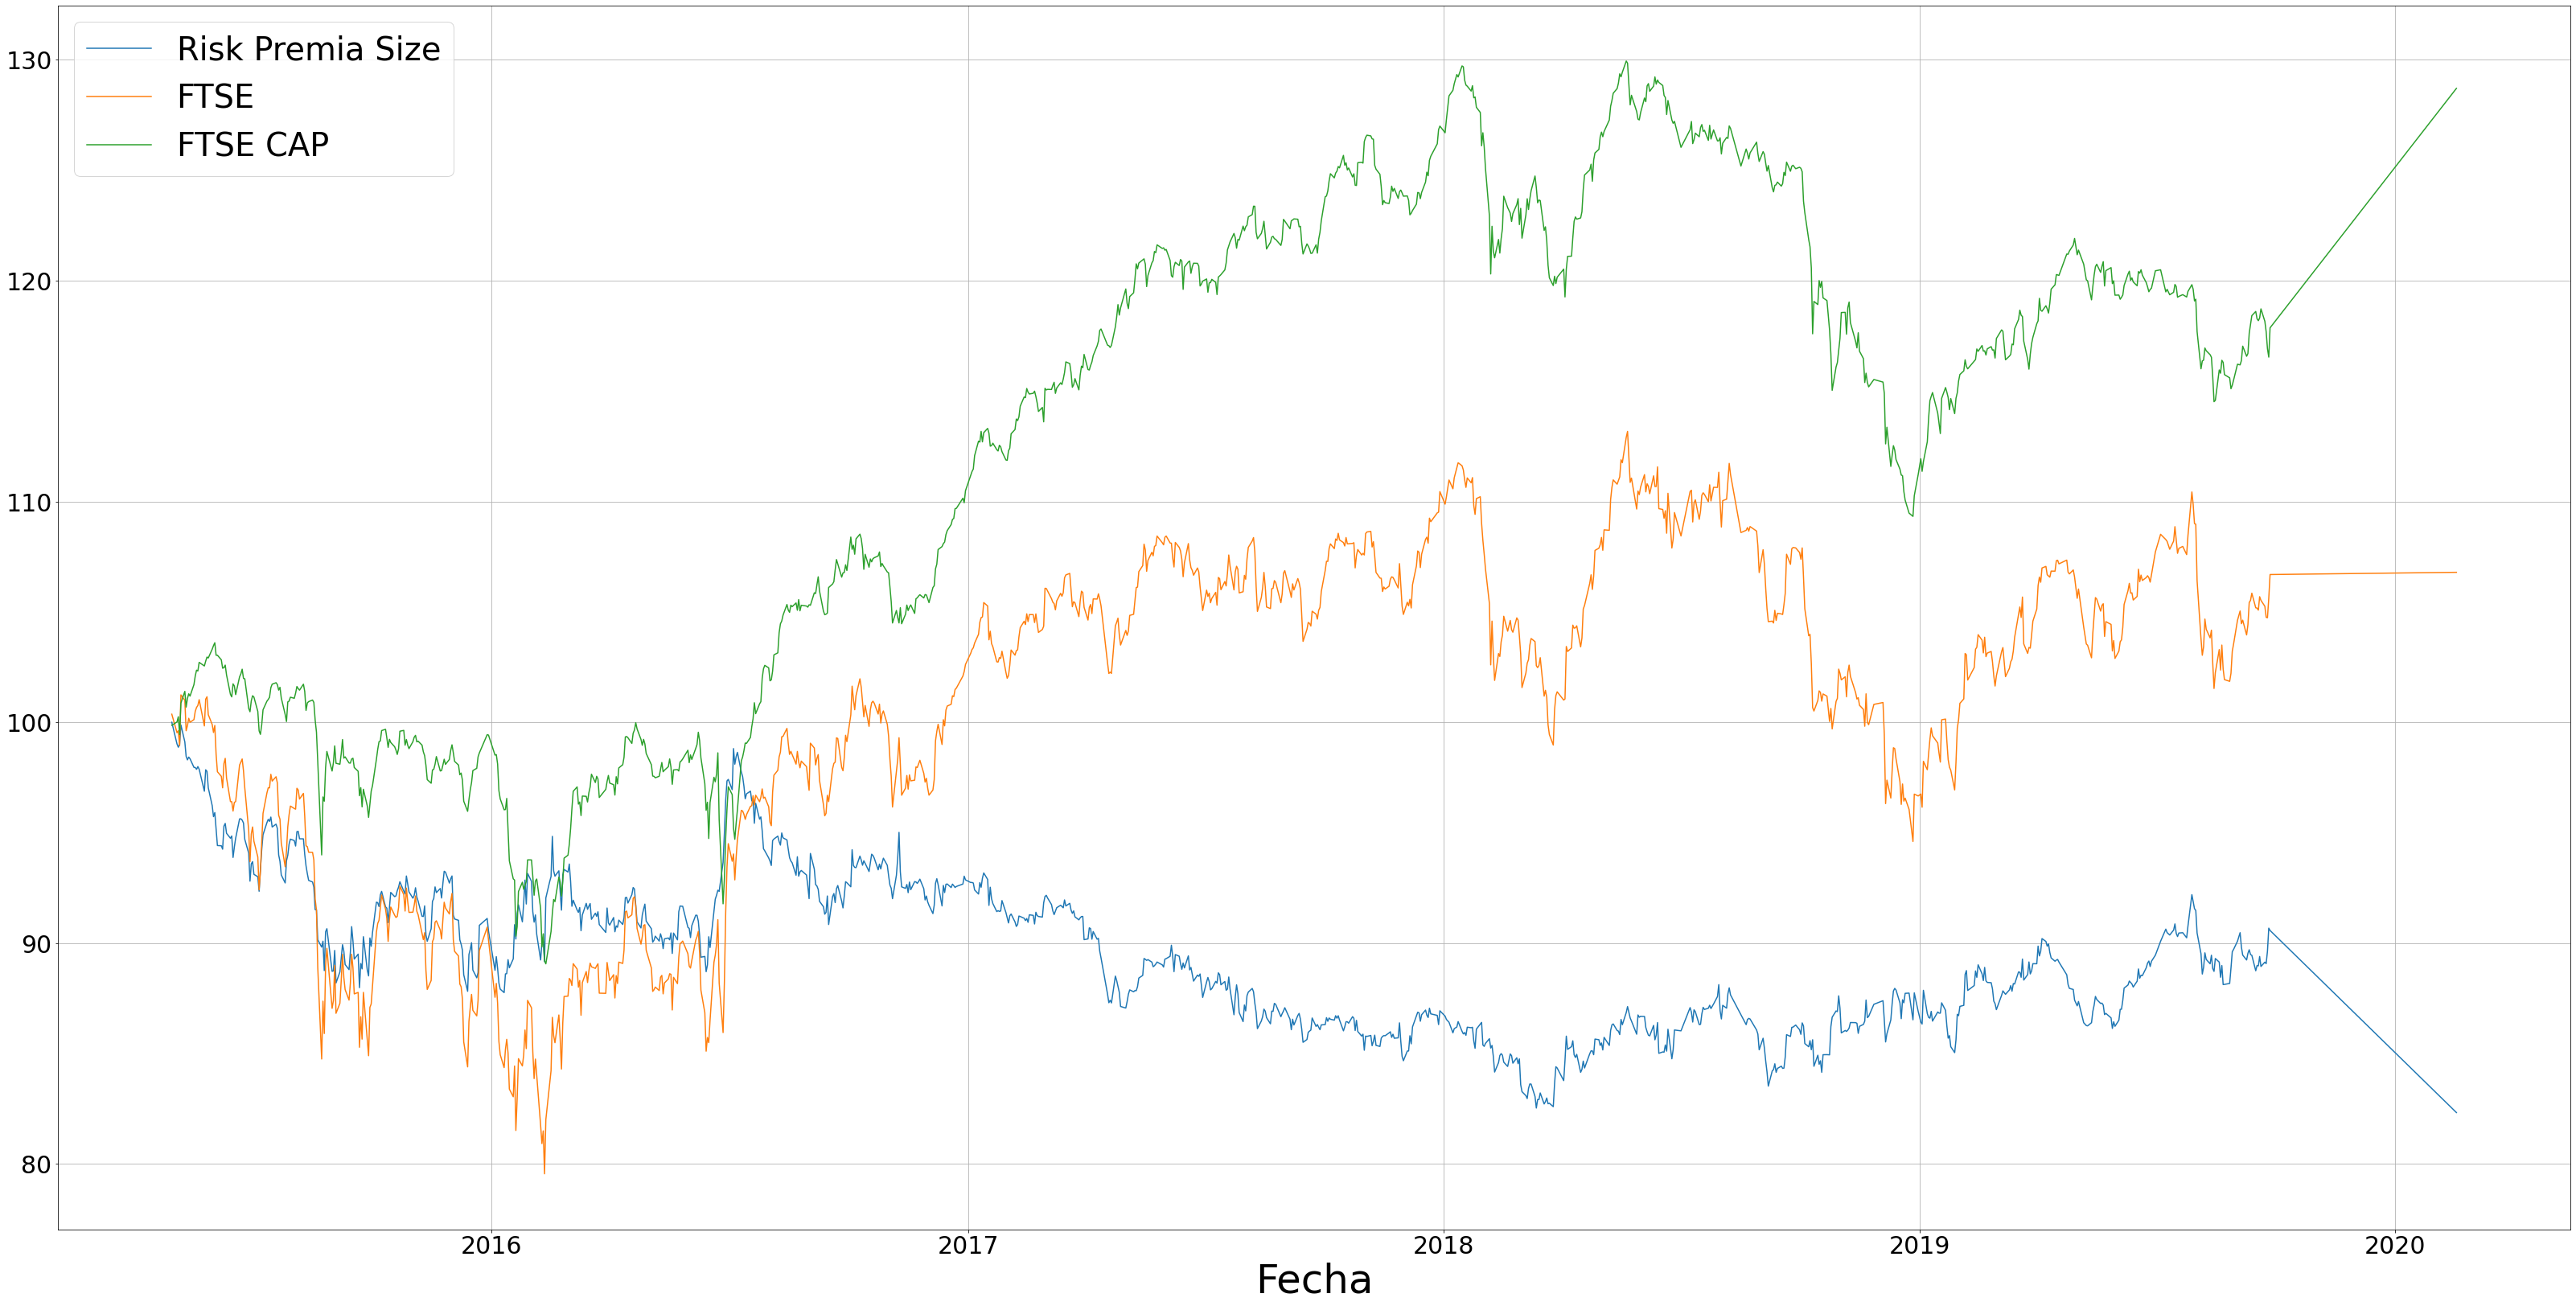

In [10]:
# Grafico la evolucion de las estrategias

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(indices["Estrategia"])
ax1 = plt.plot(indices["Evolucion FTSE"])
ax1 = plt.plot(indices["Evolucion FTSE_CAP"])
ax1 = plt.xlabel("Fecha", fontsize=50)
x = plt.xticks(fontsize=30)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(["Risk Premia Size", "FTSE", "FTSE CAP"],
                 prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

Guardamos los resultados de la estrategia en formato csv para posteriormente utilizarlos en la construcción de una cartera.

In [11]:
risk_size = pd.DataFrame({'Size': indices['Estrategia']})
risk_size.to_csv('Estrategia_Size.csv')